### Compute O2 flux from BIO contribution
### BIO = SMS_O2 + O2sink (bottom) + O2flux (surface)  -------> SalishSea_oxy2

### Rate = BIO + PHS

In [63]:
import cmocean.cm as cm
import copy
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

from salishsea_tools import viz_tools

In [64]:
mycmap = copy.copy(cm.thermal)
mycmap.set_bad('darkgreen')

In [90]:
with xr.open_dataset('/ocean/atall/MOAD/grid/mesh_mask_202310b.nc') as mesh:
    tmask = mesh.tmask
    mbathy = mesh.mbathy
with xr.open_dataset('/ocean/atall/MOAD/Model/202410b/oxygen/01jan17/SalishSea_1d_20170101_20170101_diag_T.nc') as data:
    rate = data['RATE_O2'][0,0]
    phs = data['PHS_O2'][0,0]
    bio = data['BIO_O2'][0,0]
    sms = data['SMS_O2'][0,0]
O2flux=bio-sms
rate_comp = bio+phs
data

<xarray.Dataset>
Dimensions:               (y: 898, x: 398, nvertex: 4, deptht: 40,
                           axis_nbounds: 2, time_counter: 1)
Coordinates:
    nav_lat               (y, x) float32 ...
    nav_lon               (y, x) float32 ...
  * deptht                (deptht) float32 0.5 1.5 2.5 3.5 ... 387.6 414.5 441.5
    time_centered         (time_counter) datetime64[ns] ...
  * time_counter          (time_counter) datetime64[ns] 2017-01-01T12:00:00
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables: (12/20)
    bounds_nav_lon        (y, x, nvertex) float32 ...
    bounds_nav_lat        (y, x, nvertex) float32 ...
    area                  (y, x) float32 ...
    deptht_bounds         (deptht, axis_nbounds) float32 ...
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] ...
    time_counter_bounds   (time_counter, axis_nbounds) datetime64[ns] ...
    ...                    ...
    PRD_O2                (time_counter, deptht, y, x) float32 ...
    MRT_O2                (time_counter, deptht, y, x) float32 ...
    REM_O2                (time_counter, deptht, y, x) float32 ...
    NIT_O2                (time_counter, deptht, y, x) float32 ...
    MSZ_O2                (time_counter, deptht, y, x) float32 ...
    MIZ_O2                (time_counter, deptht, y, x) float32 ...
Attributes:
    name:         SalishSea_1d_20170101_20170131_diag_T
    description:  diagnostic terms of DO
    title:        diagnostic terms of DO
    Conventions:  CF-1.6
    timeStamp:    2025-Mar-01 02:20:52 GMT
    uuid:         c186cb04-1469-45b9-b002-54b2ae141106

In [71]:
area = mesh.e1t[0] * mesh.e2t[0]

In [74]:
O2flux2=O2flux*area

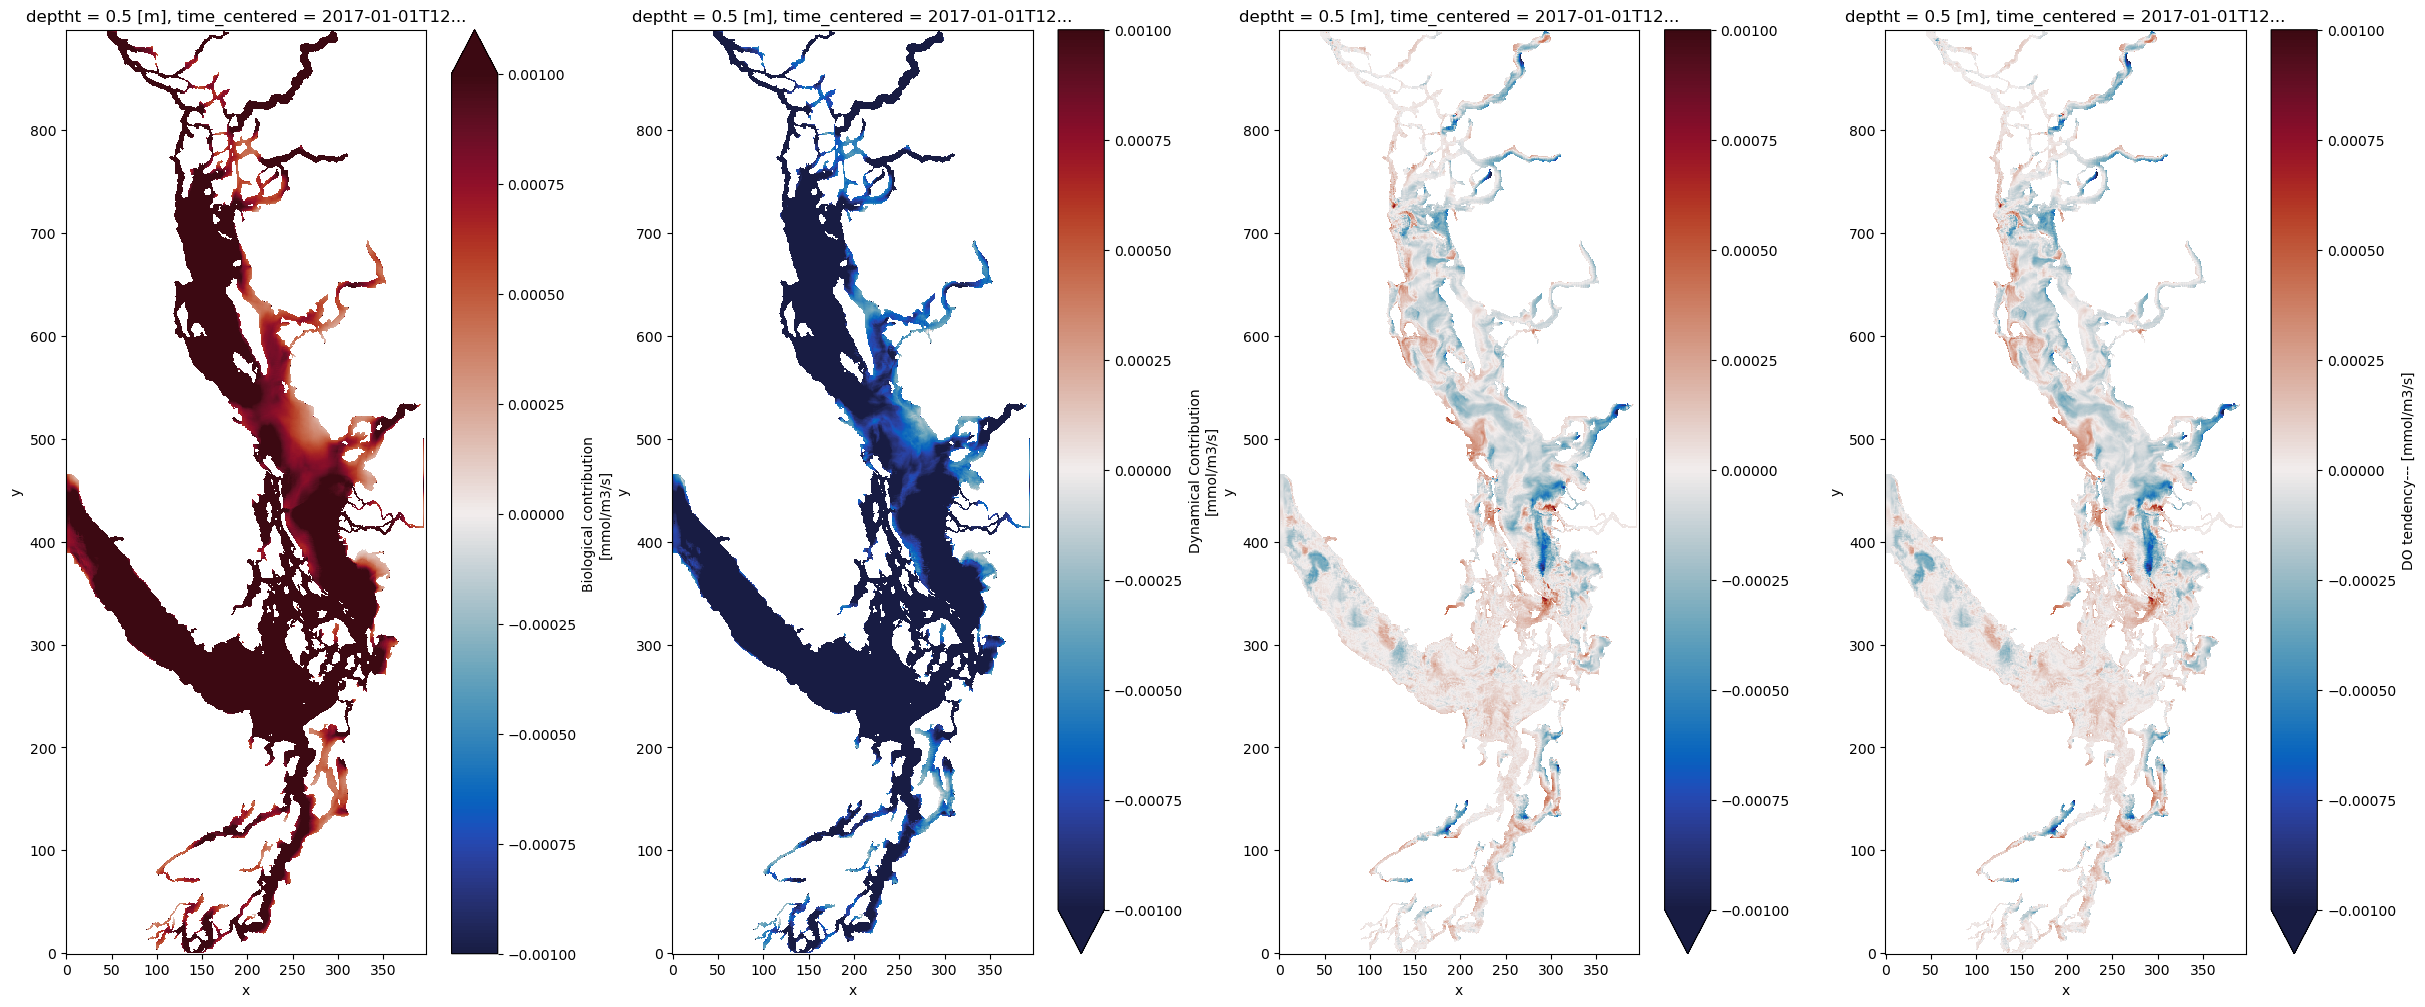

In [89]:
fig, ax = plt.subplots(1, 4, figsize=(30, 12))
vmin=-0.001
vmax=-vmin
bio.where(tmask[0, 0] == 1).plot(ax=ax[0], vmin=vmin, vmax=vmax, cmap=cm.balance)
viz_tools.set_aspect(ax[0]);
phs.where(tmask[0, 0] == 1).plot(ax=ax[1], vmin=vmin, vmax=vmax, cmap=cm.balance)
viz_tools.set_aspect(ax[1]);
rate_comp.where(tmask[0, 0] == 1).plot(ax=ax[2], vmin=vmin, vmax=vmax, cmap=cm.balance)
viz_tools.set_aspect(ax[2]);
rate.where(tmask[0, 0] == 1).plot(ax=ax[3], vmin=vmin, vmax=vmax, cmap=cm.balance)
viz_tools.set_aspect(ax[3]);

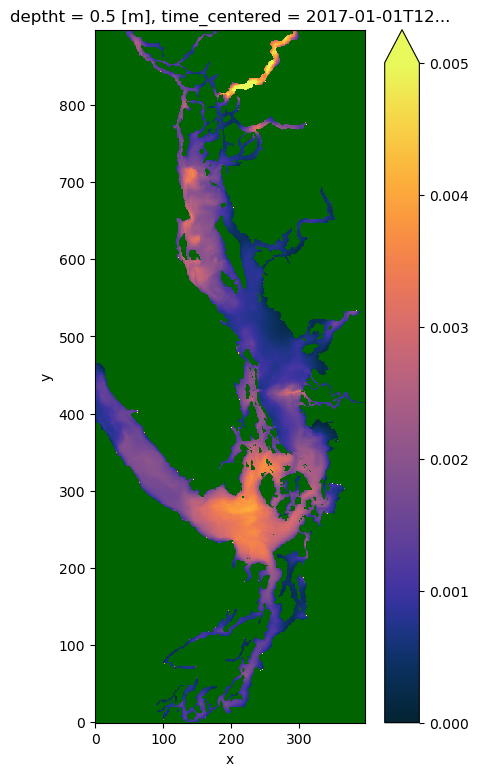

In [66]:
fig, ax = plt.subplots(1, 1, figsize=(5, 9))
O2flux.where(tmask[0, 0] == 1).plot(ax=ax, vmin=0, vmax=0.005, cmap=mycmap)
viz_tools.set_aspect(ax);

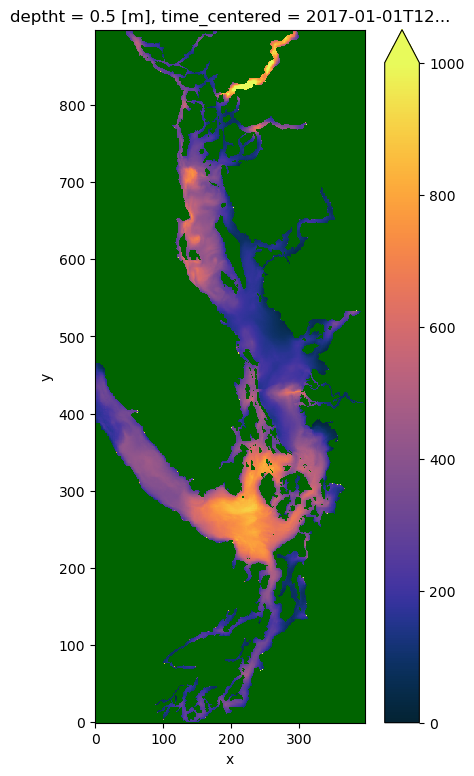

In [77]:
fig, ax = plt.subplots(1, 1, figsize=(5, 9))
O2flux2.where(tmask[0, 0] == 1).plot(ax=ax, vmin=0, vmax=1000, cmap=mycmap)
viz_tools.set_aspect(ax);

In [91]:
print('Whole domaine')
print('O2_flux = ',np.array(np.sum(O2flux)),'mmol/m3/s')
print('O2_flux = ',np.array(np.sum(O2flux2)),'mmol/s over 1m tickness')

print('Juan de Fuca')
print('O2_flux = ',np.array(np.sum(O2flux[200:500,:250])),'mmol/m3/s')
print('O2_flux = ',np.array(np.sum(O2flux2[200:500,:250])),'mmol/s over 1m tickness')

print('Johnstone Strait')
print('O2_flux = ',np.array(np.sum(O2flux[720:,:250])),'mmol/m3/s')
print('O2_flux = ',np.array(np.sum(O2flux2[720,:250])),'mmol/s over 1m tickness')

Whole domaine
O2_flux =  130.72247 mmol/m3/s
O2_flux =  28408505.645467393 mmol/s over 1m tickness
Juan de Fuca
O2_flux =  49.506416 mmol/m3/s
O2_flux =  10972160.442415524 mmol/s over 1m tickness
Johnstone Strait
O2_flux =  10.892594 mmol/m3/s
O2_flux =  24017.65311802235 mmol/s over 1m tickness
